# Practical Exercise with MNIST Example

In [6]:
import torch
import torch.nn

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from model import ImageClassifier
from utils import load_mnist

In [8]:
model_fn = "./model.pth"

In [9]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [15]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['model']

In [16]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28,28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict:", float(torch.argmax(y_hat[i], dim=-1)))

In [17]:
def test(model, x, y, to_be_shown=True):
    model.eval()
    
    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))
        
        accuracy = correct_cnt / total_cnt
        print("Accuracy: %.4f" % accuracy)
        
        if to_be_shown:
            plot(x, y_hat)

In [19]:
summary(model)

NameError: name 'summary' is not defined

Accuracy: 1.0000


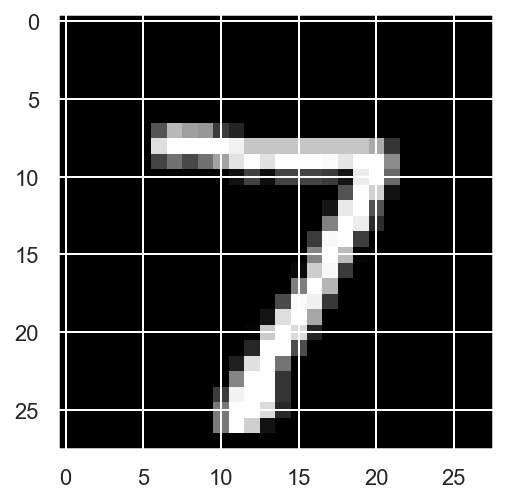

Predict: 7.0


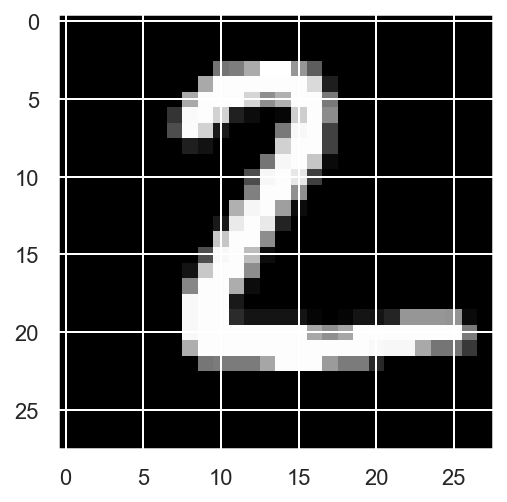

Predict: 2.0


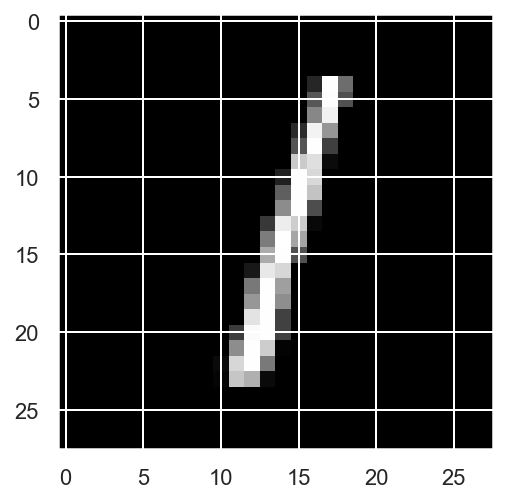

Predict: 1.0


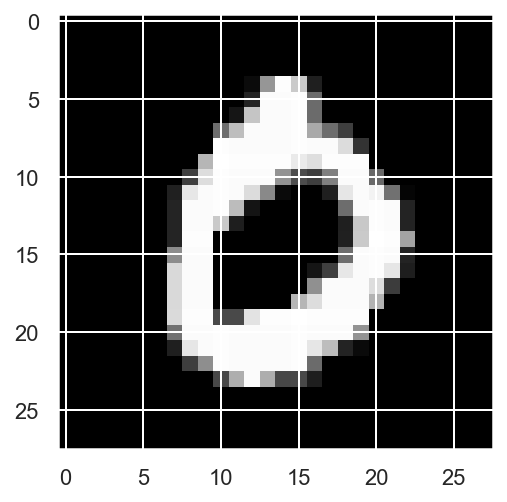

Predict: 0.0


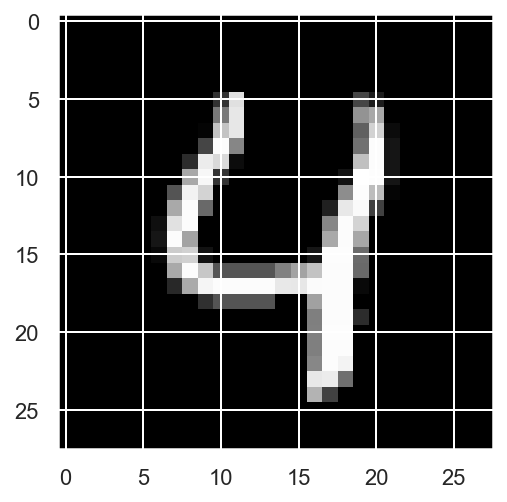

Predict: 4.0


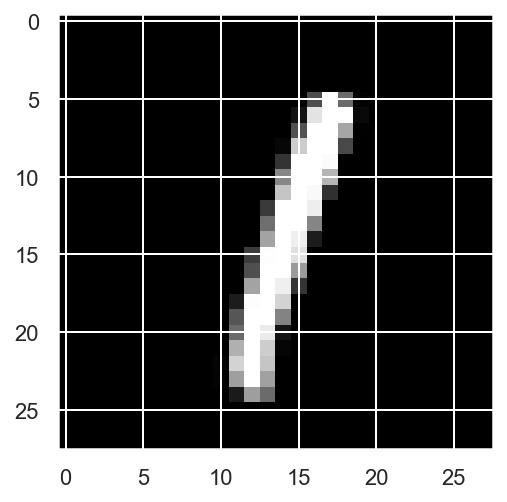

Predict: 1.0


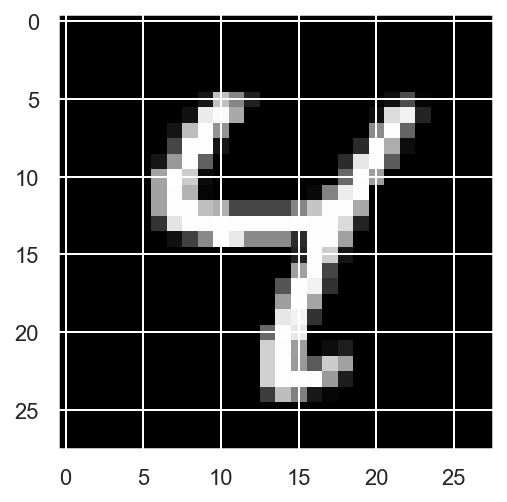

Predict: 4.0


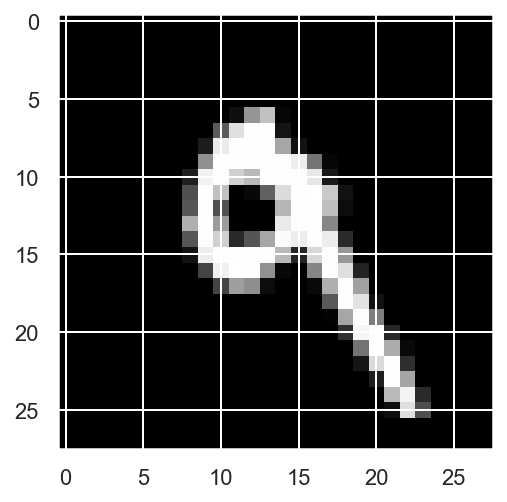

Predict: 9.0


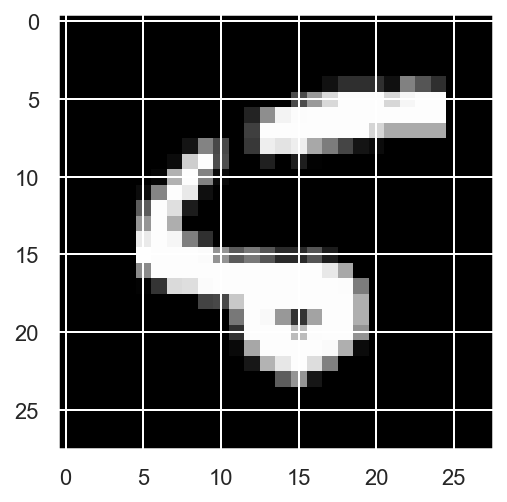

Predict: 5.0


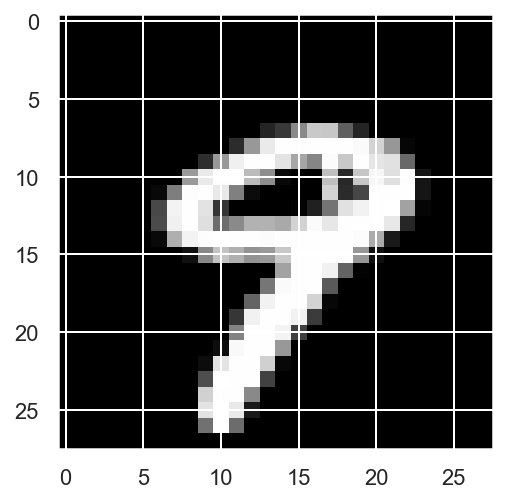

Predict: 9.0


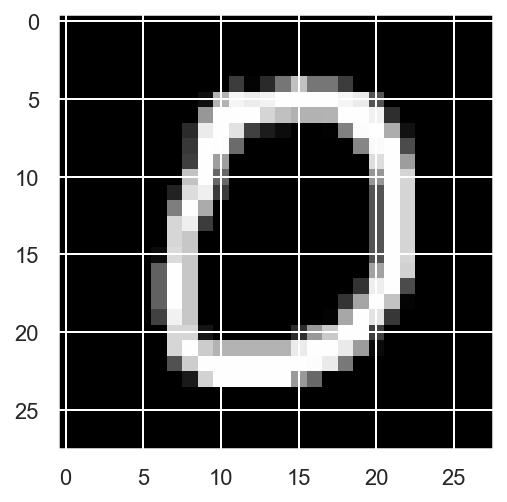

Predict: 0.0


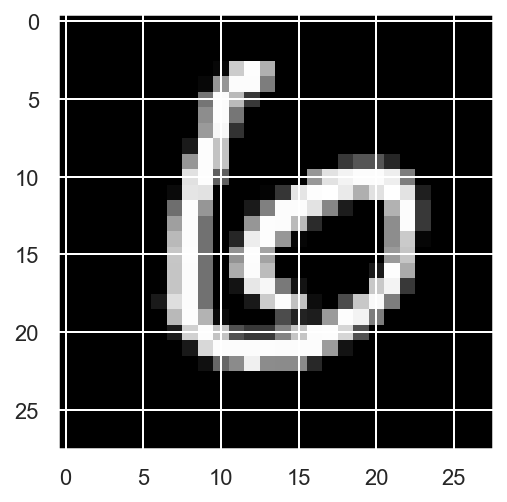

Predict: 6.0


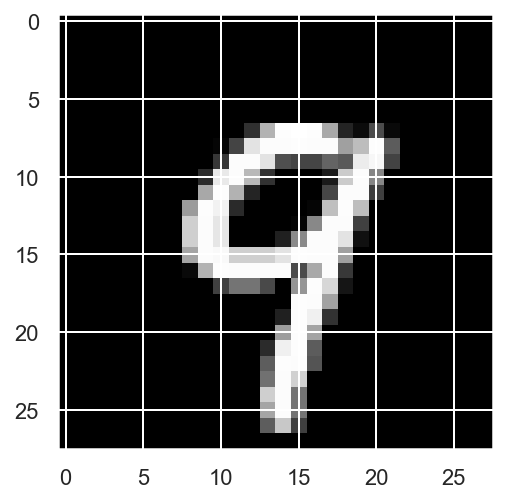

Predict: 9.0


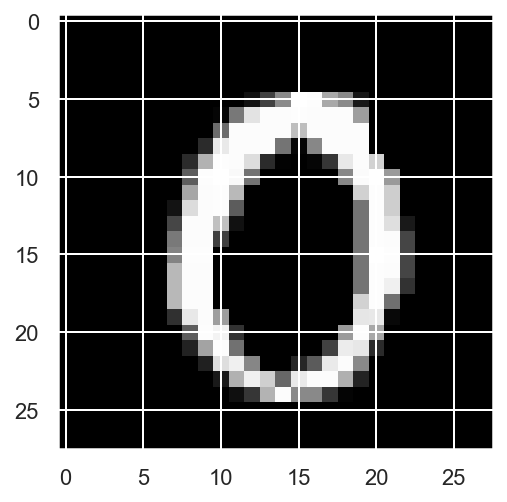

Predict: 0.0


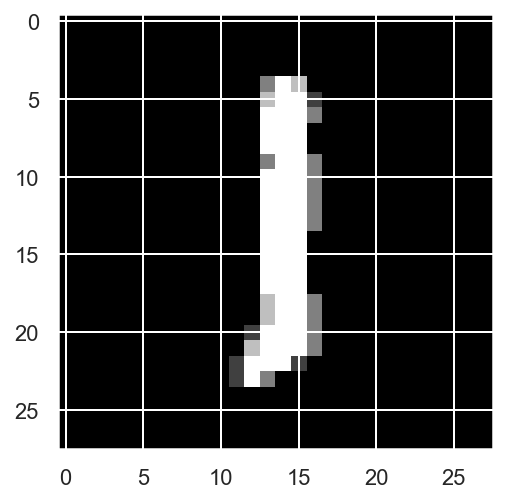

Predict: 1.0


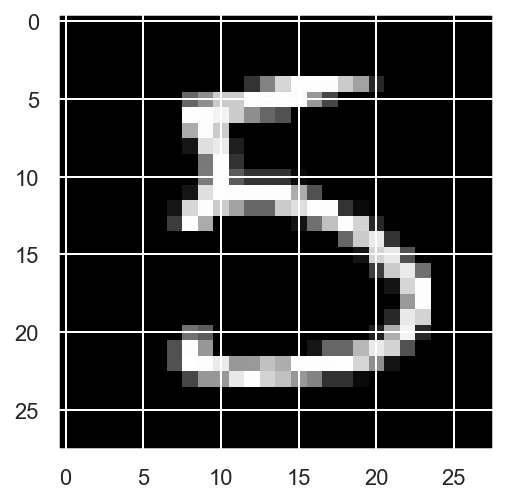

Predict: 5.0


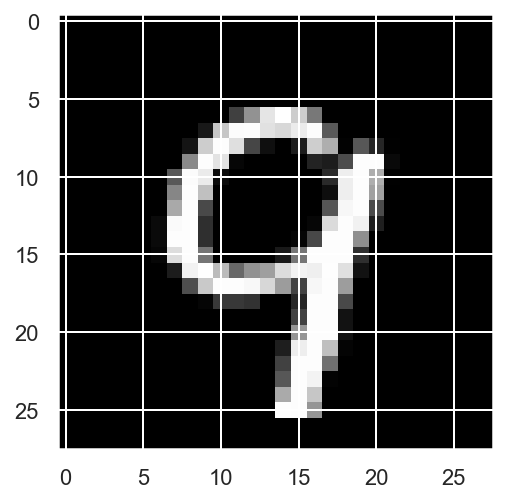

Predict: 9.0


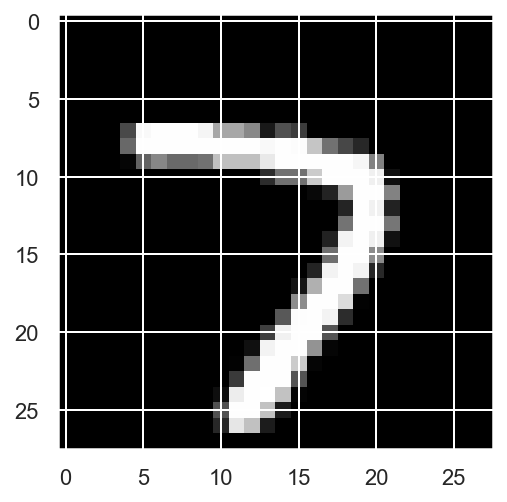

Predict: 7.0


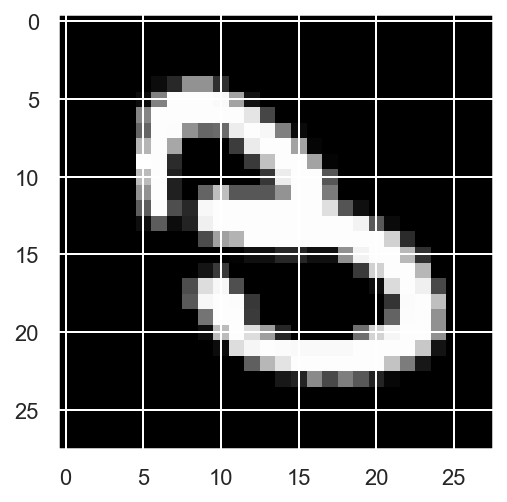

Predict: 3.0


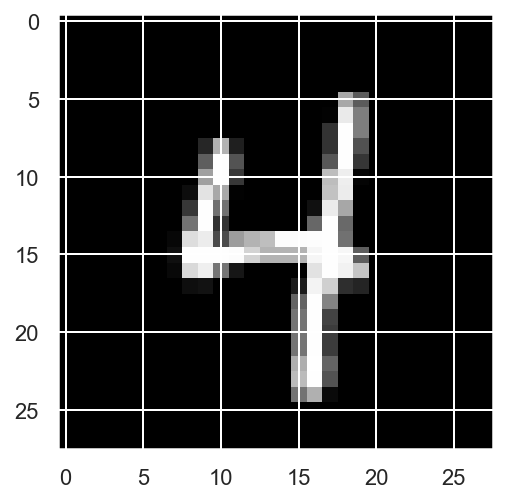

Predict: 4.0


In [18]:
# Load MNIST test set.
x, y = load_mnist(is_train=False)
# Reshape tensor to chunk of 1-d vectors.
x = x.view(x.size(0), -1)

x, y = x.to(device), y.to(device)

model = ImageClassifier(28**2, 10).to(device)
model.load_state_dict(load(model_fn, device))

test(model, x[:20], y[:20], to_be_shown=True)

In [21]:
!pip3 install torchsummary

In [29]:
x.view(x.size(0), -1).shape

torch.Size([10000, 784])

In [35]:
model(x[:2])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [40]:
model

ImageClassifier(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=500, out_features=400, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=400, out_features=300, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=300, out_features=200, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=200, out_features=100, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=